## Matplotlib Bar-Chart Storytelling

In [173]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")

df

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
...,...,...,...,...,...
4372,2017,1,Nilsson,3,0.0
4373,2017,1,Maserati,2,0.0
4374,2017,1,Ferrari,1,0.0
4375,2017,1,Smart,1,0.0


In [174]:
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [175]:
df_quantity_brand = duckdb.query(
    """--sql
    SELECT 
        make AS Brand,
        SUM(quantity) AS Quantity
    FROM 
        df
    GROUP BY
        Brand
    ORDER BY
        Quantity DESC

"""
).df().set_index("Brand")

df_quantity_brand

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
...,...
Martin Motors,1.0
Secma,1.0
Westfield,1.0


## Bar Charts

### Bar Chart 00 (Initial):

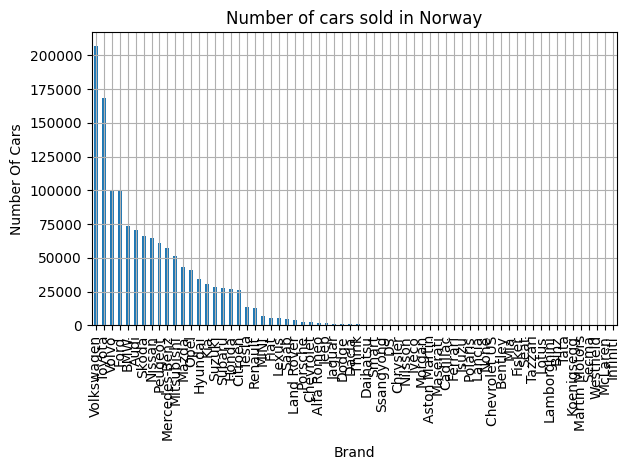

In [176]:
ax = df_quantity_brand.plot(
    kind="bar",
    title="Number of cars sold in Norway",
    ylabel="Number Of Cars",
    legend=False,
)

ax.grid()  # lägger till en grid i plot

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/barchart_00_initial.png")

### Bar Chart 01 (Top 10):

In [177]:
df_quantity_brand.iloc[:10] # top 10 brands

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
Audi,70475.0
Skoda,66007.0
Nissan,64535.0
Peugeot,61033.0


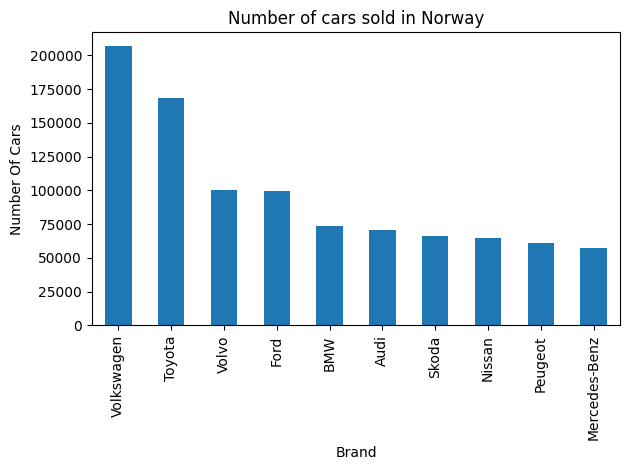

In [178]:
ax = df_quantity_brand.iloc[:10].plot(
    kind="bar",
    title="Number of cars sold in Norway",
    ylabel="Number Of Cars",
    legend=False,
)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/barchart_01_top10.png")

## Apply Data Storytelling

- remove clutter
- adjust contrast
- use colors sparingly
- descriptive title and labels
- positioning title and labels
- proximity principle with annotations
- percentage instead of absolute values
- rotate labels (rotate whole picture, horizontal bar)

In [179]:
# percentage instead of absolute values

df_quantity_brand["Quantity"] / df_quantity_brand["Quantity"].sum() * 100

Brand
Volkswagen       15.340063
Toyota           12.482984
Volvo             7.417851
Ford              7.401225
BMW               5.441826
                   ...    
Martin Motors     0.000074
Secma             0.000074
Westfield         0.000074
McLaren           0.000074
Infiniti          0.000074
Name: Quantity, Length: 66, dtype: float64

In [180]:
# quick check

df_percentage = df_quantity_brand["Quantity"] / df_quantity_brand["Quantity"].sum() * 100

df_percentage.sum()

np.float64(100.00000000000001)

In [181]:
# adjust colors, use sparingly

df_percentage_top10 = df_percentage.iloc[:10]

colors = [GRAY_1]*len(df_percentage_top10)
colors[2] = BLUE_1
colors

['#CCCCCC',
 '#CCCCCC',
 '#1E4E5C',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC']

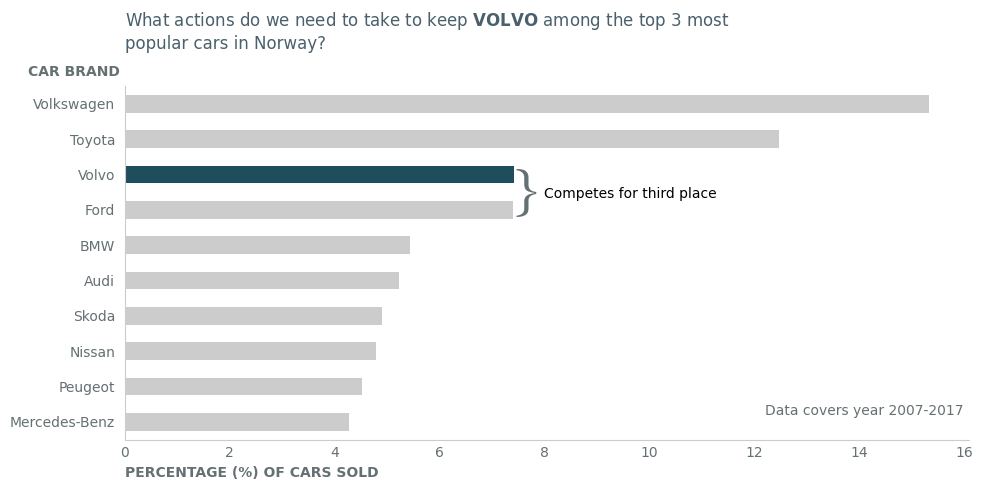

In [306]:
# horizontal bar chart
ax = df_percentage_top10.plot(
    kind="barh",
    # title="Car brands sold in Norway %",
    ylabel="Top 10 Brands",
    figsize=(10, 5),
    width=0.5,
    color=colors,
    legend=False,
)

ax.invert_yaxis()

# remove clutter
ax.spines[["top", "right"]].set_visible(False)

# adjust contrast & ticks
ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", colors=GRAY_2, labelsize=10, length=0, pad=5)
ax.tick_params(axis="y", pad=7)

# descriptive titles & labels
# CTA - Call To Action
ax.set_title(
    "What actions do we need to take to keep "
    + r"$\bf{VOLVO}$"  # LaTeX mode (bold font - r"$\bf{"your_word_here"}$")
    + " among the top 3 most \npopular cars in Norway?",  # \n for new line
    loc="left",
    color=GRAY_3,
    pad=27,
)

# x & y label
ax.set_xlabel(
    "PERCENTAGE (%) OF CARS SOLD", color=GRAY_2, fontweight="bold", loc="left"
)
ax.set_ylabel("CAR BRAND", color=GRAY_2, fontweight="bold", rotation=0)
ax.yaxis.set_label_coords(-0.06, 1.02)

# annotations - proximity principle (lägga notering nära där det händer)
# family="Times" - om man vill ändra font
ax.annotate(xy=(7.4, 2.95), text="}", fontsize=40, color=GRAY_2, family="Times")
ax.annotate(xy=(8, 2.65), text="Competes for third place", fontsize=10)
ax.annotate(xy=(12.2, 8.8), text="Data covers year 2007-2017", fontsize=10, color=GRAY_2)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/barchart_02_storytelling.png")